## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студентка | Чурсина Н. А.|
|-----------|--------------|
|  Группа   |  М8О-308Б-18 |

Для начала, скачаем датасет MNIST. Используйте `wget` или `curl`, либо скачайте вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

In [1]:
#!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
#!curl -o mnist.pkl.gz https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
#!gzip -d mnist.pkl.gz

Теперь загружаем датасет:

In [2]:
import sys  
#!{sys.executable} -m pip install
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import base
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import pickle
with open('mnist.pkl','rb') as f:
    MNIST = pickle.load(f)
    
#print('opened')

Разбиение данных на обучающую и тестовую выборку:

In [3]:
labels = MNIST['Train']['Labels']
#нормировка RGB
data = MNIST['Train']['Features'].astype(np.float32) / 256. 

In [4]:
print('Waiting for split..')
X_train, X_test = np.split(data, [data.shape[0]*8//10])
y_train, y_test = np.split(labels, [labels.shape[0]*8//10])
print('Finally splitted!')

Waiting for split..
Finally splitted!


Testing accuracy:  0.9083333333333333
Train accuracy:  0.9251190476190476


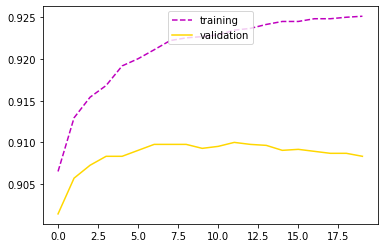

In [5]:
model = base.Net()
model.fit(X_train, y_train, n_epoch=20, batch_size=4, lr=0.1, X_test=X_test, y_test=y_test, snaps=True)
model.get_loss_acc(X_train, y_train)
print("Testing accuracy: ", accuracy_score(model.predict(X_test), y_test))
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
model.plot()

Из полученного графика видно, что нейросеть обучилась правильно и не переобучилась, поскольку разница между метриками мала.